In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
DataSet = pd.read_csv('AppleStore.csv', index_col = 'id' )
DataSet = DataSet.rename({'Unnamed: 0':'id'}, axis=1)
DataSet.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,,
281656475,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
281796108,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
281940292,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
282614216,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
282935706,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


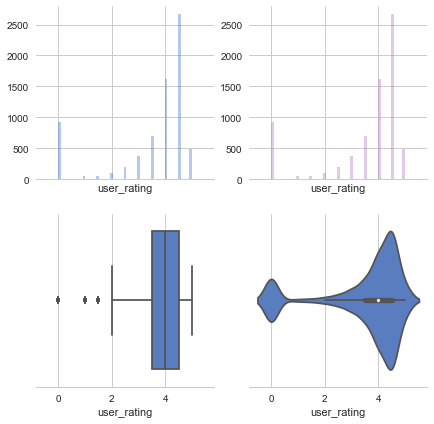

In [4]:
##Univariate Data Plots
#set the aesthetic
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(DataSet['user_rating'], kde=False, color="b", ax=axes[0, 0])

# Plot a histogram and kernel density estimate
sns.distplot(DataSet['user_rating'], kde=False, color="m", ax=axes[0, 1])

#Plot a BoxPlot
sns.boxplot(x=DataSet['user_rating'], ax = axes[1,0])

#Plot a ViolinPlot
sns.violinplot(x=DataSet['user_rating'], ax = axes[1,1])

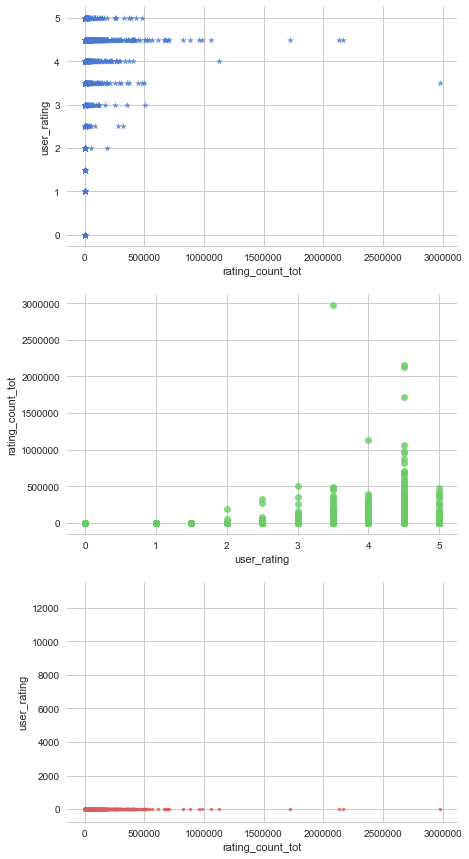

In [5]:
##Bivariate Data Plots
#set the aesthetic
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(7, 15))
sns.despine(left=True)

#Plot a simple scatterplot between the 2 variables
sns.regplot(DataSet['rating_count_tot'], DataSet['user_rating'], 
            marker = '*', fit_reg = False, ax = axes[0])

#Same Plot w/ Axes Switched
sns.regplot(DataSet['user_rating'], DataSet['rating_count_tot'],
            marker = 'o', fit_reg = False, ax = axes[1])

#Plot w/ adjusted Axes limits (MAKE ONLY UNTIL RATING COUNT TOTAL < 500,000)
sns.regplot(DataSet['rating_count_tot'], DataSet['user_rating'], 
            marker = '.', fit_reg = False, ax = axes[2])

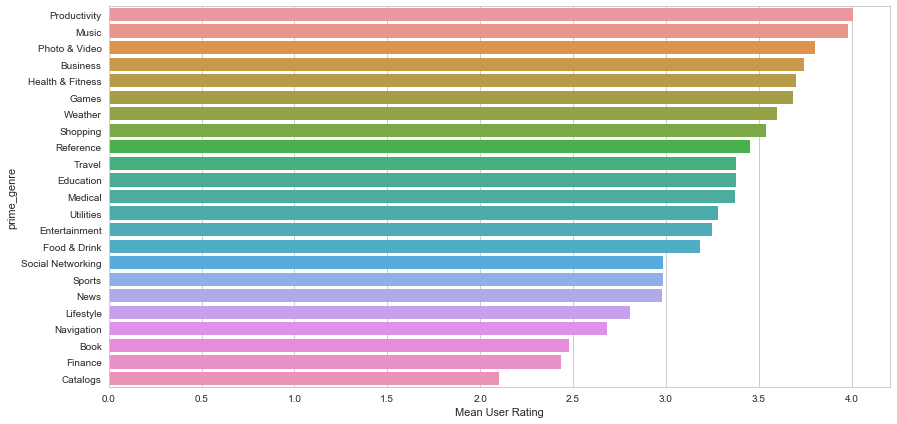

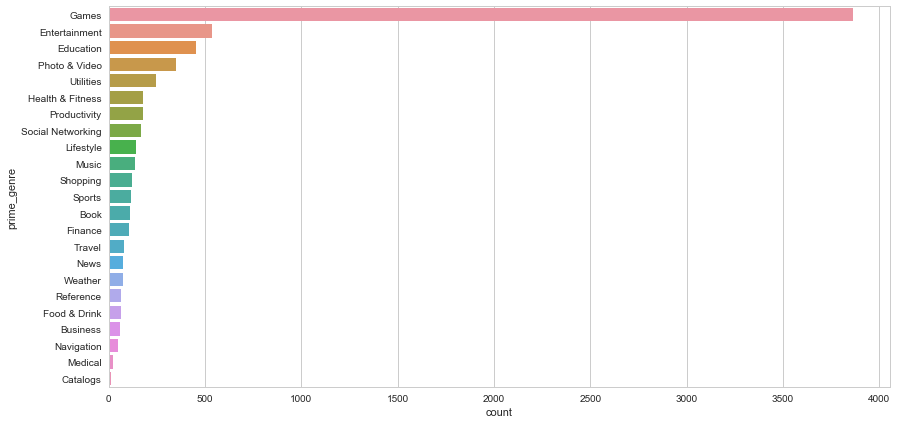

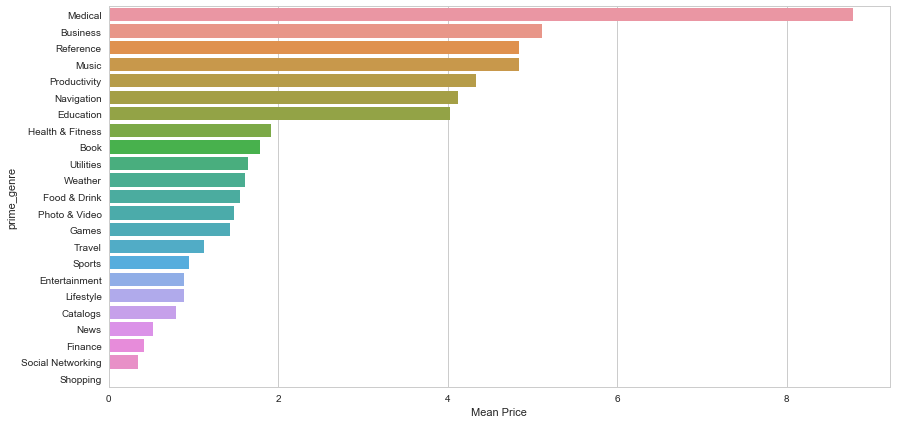

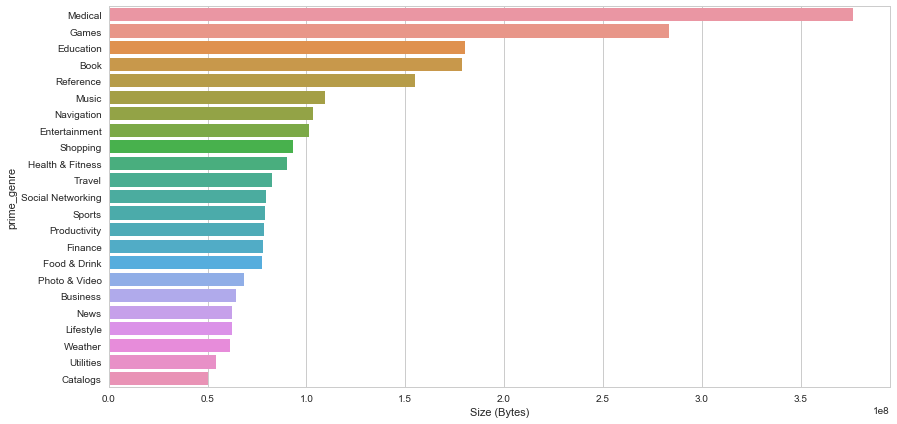

In [6]:
##1 categorical(prime_genre), 1 continuous (user_rating) 
# Set up the matplotlib figure
types=DataSet.groupby("prime_genre")["user_rating"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(y=types["prime_genre"],x=types["user_rating"],data=types)
plt.gca().set_xlabel("Mean User Rating")
plt.show()

types=DataSet.groupby("prime_genre")["id"].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(y=types["prime_genre"],x=types["id"],data=types)
plt.gca().set_xlabel("count")
plt.show()

types=DataSet.groupby("prime_genre")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(y=types["prime_genre"],x=types["price"],data=types)
plt.gca().set_xlabel("Mean Price")
plt.show()

types=DataSet.groupby("prime_genre")["size_bytes"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,7))
sns.barplot(y=types["prime_genre"],x=types["size_bytes"],data=types)
plt.gca().set_xlabel("Size (Bytes)")
plt.show()
